Develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

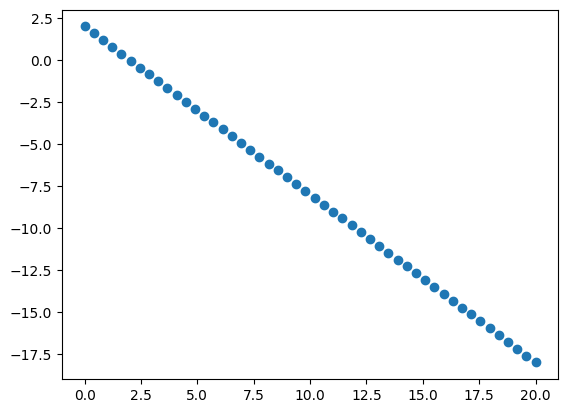

In [4]:
plt.plot(X,y,'o')

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [5]:
def single_variable_Adagrad(x,y,learning_rate,epsilon,iterations):
    thetas_0 = []
    thetas_1 = []
    loss = []
    h_xs = []

    v_theta_0 = 0
    v_theta_1 = 0
    theta_0 = 0
    theta_1 = 0
    for i in range(iterations):
        h_x = theta_0 + theta_1 * x
        error = h_x - y
        j = 1/(2*len(x)) * np.sum(error**2)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        loss.append(j)
        h_xs.append(h_x)
        d_theta_0 = (1/len(x)) * np.sum(error)
        d_theta_1 = (1/len(x)) * np.sum(error * x)
        gradient_vector = np.array([[d_theta_0],[d_theta_1]])
        print("****************** Iteration ",i,"******************")
        print("h(x):",h_x,"\n")
        print("Error Vector:\n",error)
        print("j =",j,"\n")
        print("Gradient Vector:\n",gradient_vector,"\n")
        print("Gradiant Vector Norm:\n",np.linalg.norm(gradient_vector),"\n")
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)

        if (np.linalg.norm(gradient_vector) < 0.001 or abs(loss[i-1]-j) < 0.001) and i != 0:
            print("****************** Training Report ******************\n")
            print("Gradient Descent converged after ",i," epochs\n")
            print("theta_0_Opt:",theta_0)
            print("theta_1_Opt:",theta_1,"\n")
            print("Error Vector:\n",error)
            print("Cost = ",j,"\n")
            print("h(x) = y_predict:\n",h_x,"\n")
            print("y_actual:",y,"\n")
            return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x
        
        v_theta_0 = v_theta_0 + d_theta_0**2
        v_theta_1 = v_theta_1 + d_theta_1**2
        theta_0 = theta_0 - learning_rate * (1/(np.sqrt(v_theta_0) + epsilon)) * d_theta_0
        theta_1 = theta_1 - learning_rate * (1/(np.sqrt(v_theta_1) + epsilon)) * d_theta_1
    return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x

In [6]:
thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x = single_variable_Adagrad(X,y,0.05,1e-8,500)

****************** Iteration  0 ******************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
j = 49.34693877551021 

Gradient Vector:
 [[  8.        ]
 [114.69387755]] 

Gradiant Vector Norm:
 114.97254258164628 

theta_0_new: 0
theta_1_new: 0
************

In [13]:
from sklearn.metrics import r2_score

In [8]:
print("R2 Score:",r2_score(y,h_x))

R2 Score: 0.9484638125790851


In [5]:
def loss_plot(loss,color):
    plt.plot(loss,marker='o',color=color)
    plt.grid(True)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

def theta_plot(thetas,loss,number,r,color):
    plt.plot(thetas,loss,marker='o',color=color)
    plt.grid(True)
    plt.title(f"Learning Rate = {r}")
    plt.ylabel("Loss")
    plt.xlabel(f"Theta {number}")
    plt.show()

def converge_lines(x,y,h_xs,point_color,line_color):
    plt.scatter(x,y,color=point_color,s=10)
    for i in range(len(h_xs)):
        plt.plot(x,h_xs[i],color=line_color)
        plt.grid(True)
        plt.xlabel("X")
        plt.ylabel("Y")
    plt.show()

def regression_line(x,y,h_x,point_color,line_color):
    plt.scatter(x,y,color=point_color,s=10)
    plt.plot(x,h_x,color=line_color)
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


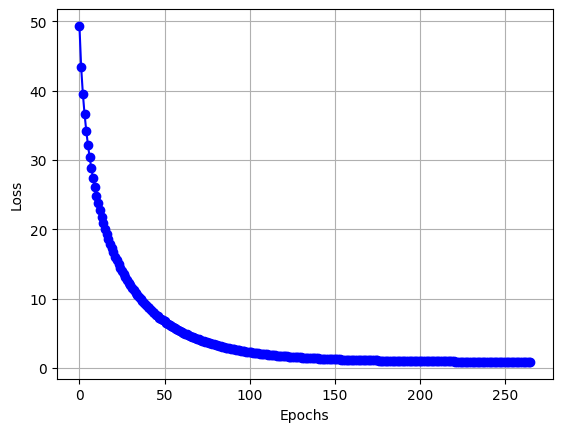

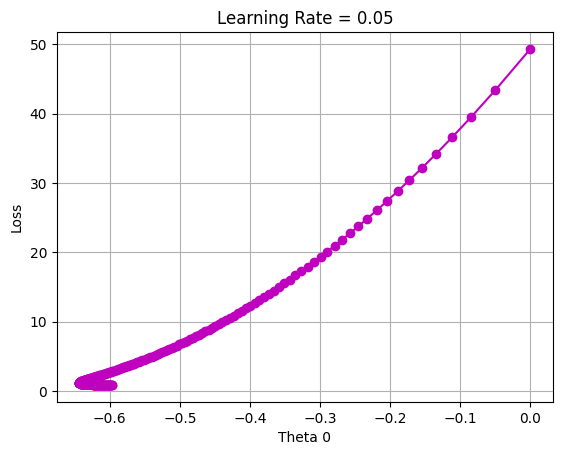

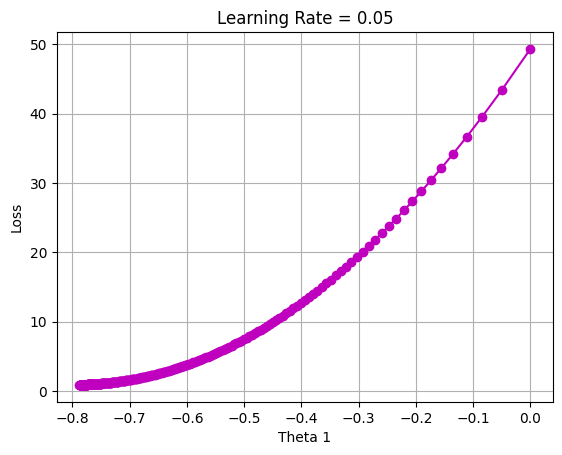

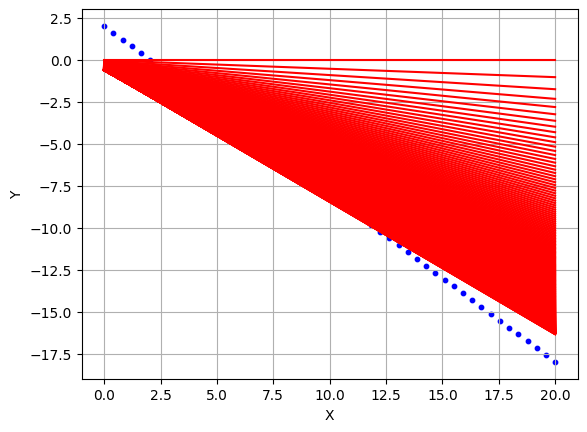

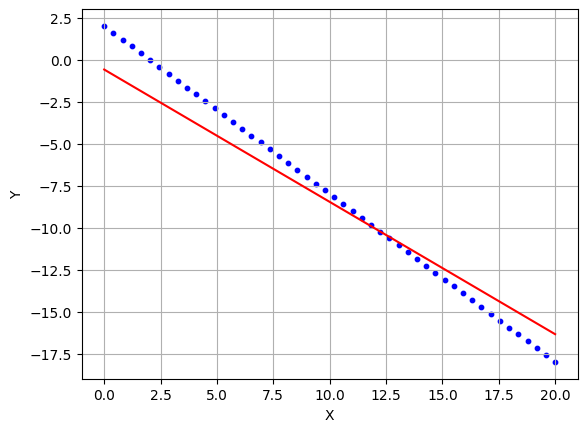

In [12]:
loss_plot(loss,'blue')
theta_plot(thetas_0,loss,0,0.05,'m')
theta_plot(thetas_1,loss,1,0.05,'m')
converge_lines(X,y,h_xs,'blue','red')
regression_line(X,y,h_x,'blue','red')

## RMSProp

### Update the previos implementation to be RMSProp.

In [10]:
def single_variable_RMSProp(x,y,learning_rate,epsilon,beta,iterations):
    thetas_0 = []
    thetas_1 = []
    loss = []
    h_xs = []

    v_theta_0 = 0
    v_theta_1 = 0
    theta_0 = 0
    theta_1 = 0
    for i in range(iterations):
        h_x = theta_0 + theta_1 * x
        error = h_x - y
        j = 1/(2*len(x)) * np.sum(error**2)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        loss.append(j)
        h_xs.append(h_x)
        d_theta_0 = (1/len(x)) * np.sum(error)
        d_theta_1 = (1/len(x)) * np.sum(error * x)
        gradient_vector = np.array([[d_theta_0],[d_theta_1]])
        print("****************** Iteration ",i,"******************")
        print("h(x):",h_x,"\n")
        print("Error Vector:\n",error)
        print("j =",j,"\n")
        print("Gradient Vector:\n",gradient_vector,"\n")
        print("Gradiant Vector Norm:\n",np.linalg.norm(gradient_vector),"\n")
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)

        if (np.linalg.norm(gradient_vector) < 0.001 or abs(loss[i-1]-j) < 0.001) and i != 0:
            print("****************** Training Report ******************\n")
            print("Gradient Descent converged after ",i," epochs\n")
            print("theta_0_Opt:",theta_0)
            print("theta_1_Opt:",theta_1,"\n")
            print("Error Vector:\n",error)
            print("Cost = ",j,"\n")
            print("h(x) = y_predict:\n",h_x,"\n")
            print("y_actual:",y,"\n")
            return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x
        
        v_theta_0 = beta * v_theta_0 + (1-beta) * (d_theta_0**2)
        v_theta_1 = beta * v_theta_1 + (1-beta) * (d_theta_1**2)
        theta_0 = theta_0 - learning_rate * (1/(np.sqrt(v_theta_0) + epsilon)) * d_theta_0
        theta_1 = theta_1 - learning_rate * (1/(np.sqrt(v_theta_1) + epsilon)) * d_theta_1
    return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [11]:
thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x = single_variable_RMSProp(X,y,0.05,1e-8,0.9,500)

****************** Iteration  0 ******************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
j = 49.34693877551021 

Gradient Vector:
 [[  8.        ]
 [114.69387755]] 

Gradiant Vector Norm:
 114.97254258164628 

theta_0_new: 0
theta_1_new: 0
************

In [16]:
print("R2 Score:",r2_score(y,h_x))

R2 Score: 0.9948527070941069


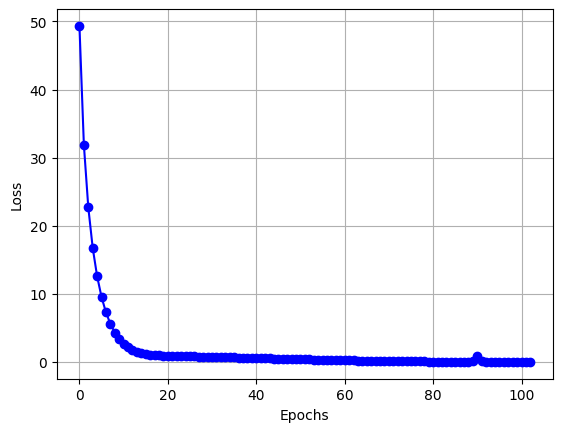

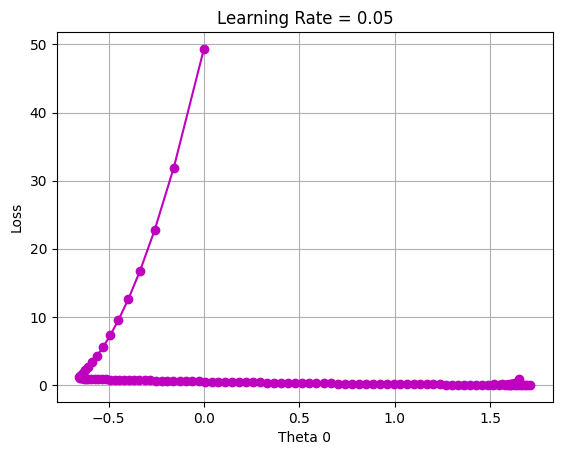

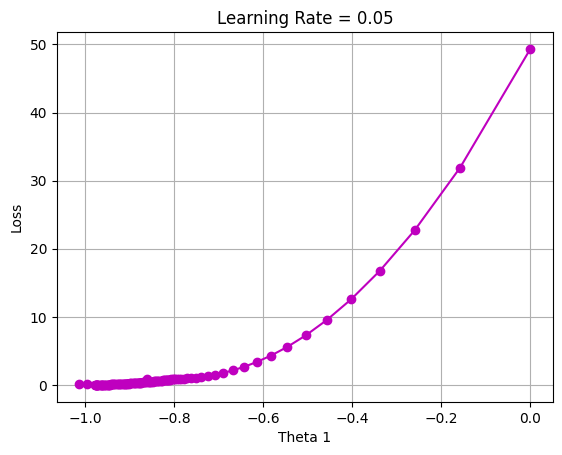

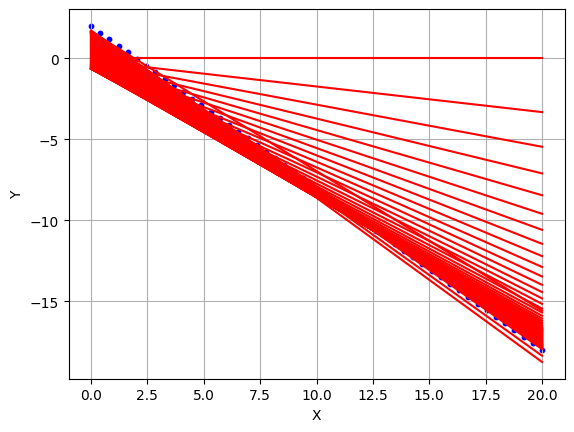

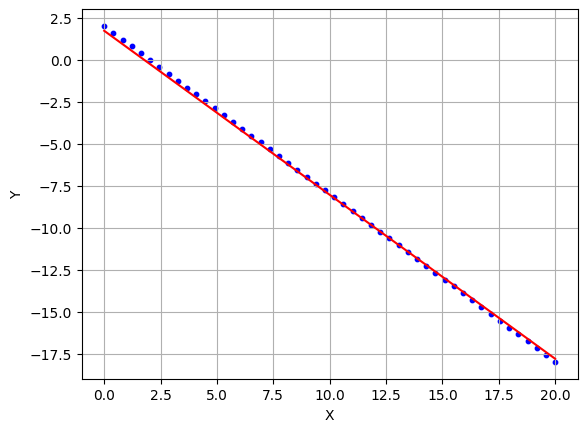

In [12]:
loss_plot(loss,'blue')
theta_plot(thetas_0,loss,0,0.05,'m')
theta_plot(thetas_1,loss,1,0.05,'m')
converge_lines(X,y,h_xs,'blue','red')
regression_line(X,y,h_x,'blue','red')

## Adam

### Update the previous implementation to be Adam.

In [19]:
def single_variable_Adam(x,y,learning_rate,epsilon,beta1,beta2,iterations):
    thetas_0 = []
    thetas_1 = []
    loss = []
    h_xs = []

    v_theta_0 = 0
    v_theta_1 = 0
    m_theta_0 = 0
    m_theta_1 = 0
    theta_0 = 0
    theta_1 = 0
    for i in range(iterations):
        h_x = theta_0 + theta_1 * x
        error = h_x - y
        j = 1/(2*len(x)) * np.sum(error**2)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        loss.append(j)
        h_xs.append(h_x)
        d_theta_0 = (1/len(x)) * np.sum(error)
        d_theta_1 = (1/len(x)) * np.sum(error * x)
        gradient_vector = np.array([[d_theta_0],[d_theta_1]])
        print("****************** Iteration ",i,"******************")
        print("h(x):",h_x,"\n")
        print("Error Vector:\n",error)
        print("j =",j,"\n")
        print("Gradient Vector:\n",gradient_vector,"\n")
        print("Gradiant Vector Norm:\n",np.linalg.norm(gradient_vector),"\n")
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)

        if (np.linalg.norm(gradient_vector) < 0.001 or abs(loss[i-1]-j) < 0.001) and i != 0:
            print("****************** Training Report ******************\n")
            print("Gradient Descent converged after ",i," epochs\n")
            print("theta_0_Opt:",theta_0)
            print("theta_1_Opt:",theta_1,"\n")
            print("Error Vector:\n",error)
            print("Cost = ",j,"\n")
            print("h(x) = y_predict:\n",h_x,"\n")
            print("y_actual:",y,"\n")
            return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x
        
        m_theta_0 = beta1 * m_theta_0 + (1-beta1) * d_theta_0
        m_theta_1 = beta1 * m_theta_1 + (1-beta1) * d_theta_1

        v_theta_0 = beta2 * v_theta_0 + (1-beta2) * (d_theta_0**2)
        v_theta_1 = beta2 * v_theta_1 + (1-beta2) * (d_theta_1**2)
        m_bias_correction_0 = m_theta_0 / (1 - beta1**(i+1))
        m_bias_correction_1 = m_theta_1 / (1 - beta1**(i+1))
        v_bias_correction_0 = v_theta_0 / (1 - beta2**(i+1))
        v_bias_correction_1 = v_theta_1 / (1 - beta2**(i+1))
        theta_0 = theta_0 - learning_rate * (1/(np.sqrt(v_bias_correction_0) + epsilon)) * m_bias_correction_0
        theta_1 = theta_1 - learning_rate * (1/(np.sqrt(v_bias_correction_1) + epsilon)) * m_bias_correction_1
    return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x

##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [20]:
thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x = single_variable_Adam(X,y,0.05,1e-8,0.2,0.7,500)

****************** Iteration  0 ******************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]
j = 49.34693877551021 

Gradient Vector:
 [[  8.        ]
 [114.69387755]] 

Gradiant Vector Norm:
 114.97254258164628 

theta_0_new: 0
theta_1_new: 0
************

In [21]:
print("R2 Score:",r2_score(y,h_x))

R2 Score: 0.9989675218213928


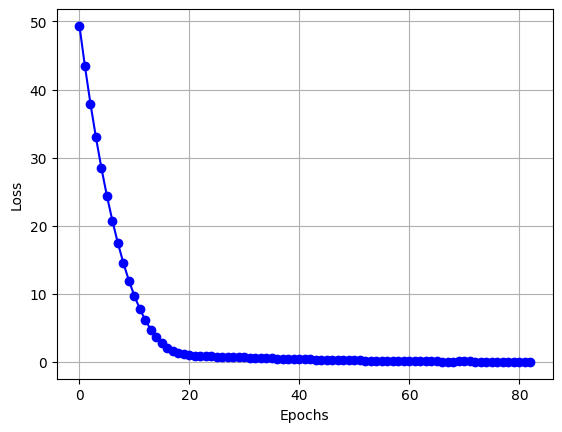

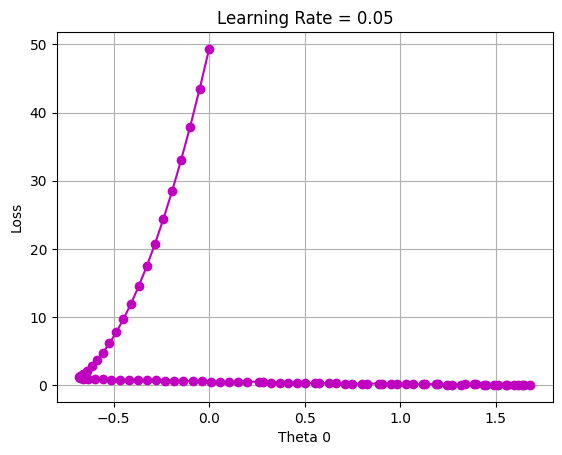

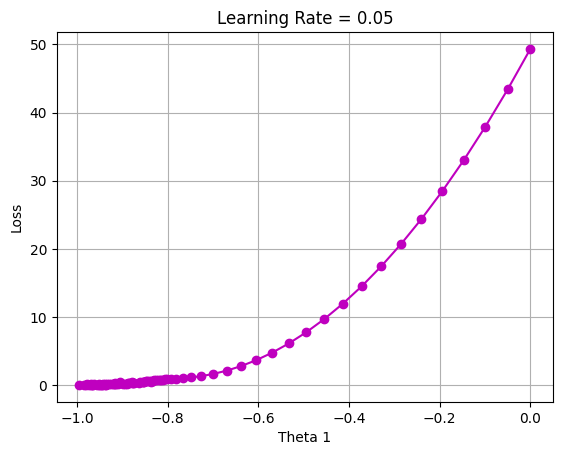

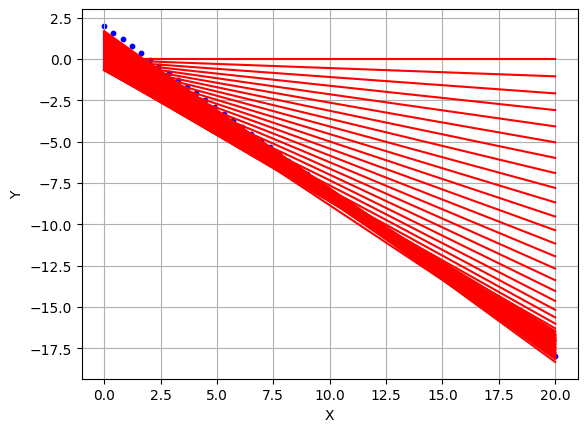

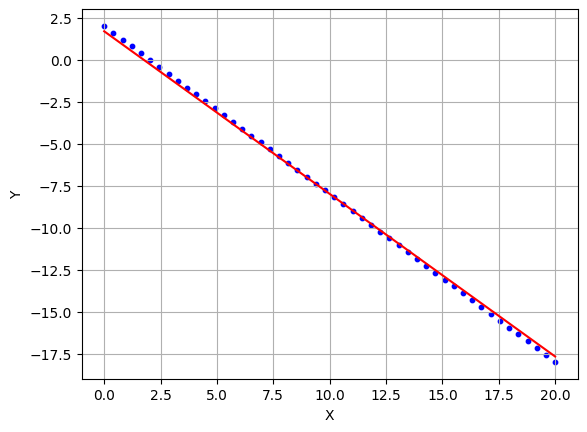

In [22]:
loss_plot(loss,'blue')
theta_plot(thetas_0,loss,0,0.05,'m')
theta_plot(thetas_1,loss,1,0.05,'m')
converge_lines(X,y,h_xs,'blue','red')
regression_line(X,y,h_x,'blue','red')